<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sample-Questions" data-toc-modified-id="Sample-Questions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sample Questions</a></span><ul class="toc-item"><li><span><a href="#1.-What-percentage-of-questions-have-been-answered-over-the-years?" data-toc-modified-id="1.-What-percentage-of-questions-have-been-answered-over-the-years?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1. What percentage of questions have been answered over the years?</a></span></li><li><span><a href="#2.-What-are-the-10-‘easiest’-gold-badges-to-earn?" data-toc-modified-id="2.-What-are-the-10-‘easiest’-gold-badges-to-earn?-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2. What are the 10 ‘easiest’ gold badges to earn?</a></span></li><li><span><a href="#3.-Which-day-of-the-week-has-most-questions-answered-within-an-hour?" data-toc-modified-id="3.-Which-day-of-the-week-has-most-questions-answered-within-an-hour?-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>3. Which day of the week has most questions answered within an hour?</a></span></li><li><span><a href="#4.-Does-adding-a-“?”-actually-help-user-to-get-answers?" data-toc-modified-id="4.-Does-adding-a-“?”-actually-help-user-to-get-answers?-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>4. Does adding a “?” actually help user to get answers?</a></span></li></ul></li><li><span><a href="#What's-Next?" data-toc-modified-id="What's-Next?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>What's Next?</a></span></li></ul></div>

[Date Functions in Standard SQL
](https://cloud.google.com/bigquery/docs/reference/standard-sql/date_functions)

In [19]:
# Import Necessary Libraries

from google.cloud import bigquery
from google.cloud.bigquery import Dataset
from google.cloud import storage

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Project created as a owner
private_project = 'magnetic-math-233501'

# Public project of big query
public_project = 'bigquery-public-data'

# Set storage client
storage_client = storage.Client()

# Set big query client
client = bigquery.Client(project=public_project)

In [3]:
dataset_id = 'stackoverflow'

# Get the public dataset
dataset_ref = client.dataset(dataset_id, project=public_project)

In [4]:
def printTableList(client, dataset_id):
    project = client.project
    dataset_ref = client.dataset(dataset_id, project = project)    
    tables = list(client.list_tables(dataset_ref))
    if tables:
        print('Tables in dataset {}:'.format(dataset_id))
        for table in tables: 
            print('\t{}'.format(table.table_id))
        found = True
    else:
        print('{} dataset does not contain any tables.'.format(dataset_id))
        found = False
    return found

In [5]:
printTableList(client, dataset_id)

Tables in dataset stackoverflow:
	badges
	comments
	post_history
	post_links
	posts_answers
	posts_moderator_nomination
	posts_orphaned_tag_wiki
	posts_privilege_wiki
	posts_questions
	posts_tag_wiki
	posts_tag_wiki_excerpt
	posts_wiki_placeholder
	stackoverflow_posts
	tags
	users
	votes


True

In [7]:
# Set the project as private to run queries
client = bigquery.Client(project=private_project)

### Sample Questions

#### 1. What percentage of questions have been answered over the years?

Use following table 

> `bigquery-public-data.stackoverflow.posts_questions`

Present data visually.

In [11]:
# function to print a table schema:
def printTableSchema(aTable):
    schemas = list(aTable.schema)
    if schemas:
        print('Table schema for {}:'.format(aTable.table_id))
        for aSchema in schemas:
            print('\t{0} {1}'.format(aSchema.name, aSchema.field_type))
        found = True
    else:
        found = False
    return found

In [12]:
table_ref = dataset_ref.table('posts_questions')
table = client.get_table(table_ref)
printTableSchema(table)

Table schema for posts_questions:
	id INTEGER
	title STRING
	body STRING
	accepted_answer_id INTEGER
	answer_count INTEGER
	comment_count INTEGER
	community_owned_date TIMESTAMP
	creation_date TIMESTAMP
	favorite_count INTEGER
	last_activity_date TIMESTAMP
	last_edit_date TIMESTAMP
	last_editor_display_name STRING
	last_editor_user_id INTEGER
	owner_display_name STRING
	owner_user_id INTEGER
	post_type_id INTEGER
	score INTEGER
	tags STRING
	view_count INTEGER


True

In [17]:
# Get num of posts by year

query = """
        SELECT EXTRACT(YEAR FROM creation_date) AS year, COUNT(id) AS num_questions
        FROM `bigquery-public-data.stackoverflow.posts_questions`
        GROUP BY year
        """

num_questions = client.query(query).to_dataframe()

num_questions.head()

,year,num_questions
0,2016,2219199
1,2017,2137687
2,2008,58153
3,2009,343139
4,2012,1642687


In [16]:
# Get count of accepted answers by year

query = """
        SELECT EXTRACT(YEAR FROM creation_date) AS year, COUNT(accepted_answer_id) AS num_accepted_answers
        FROM `bigquery-public-data.stackoverflow.posts_questions`
        WHERE accepted_answer_id IS NOT NULL
        GROUP BY year
        """

accepted_answer = client.query(query).to_dataframe()

accepted_answer.head()

,year,num_accepted_answers
0,2017,981702
1,2016,1062314
2,2008,44010
3,2018,836234
4,2010,495828


In [22]:
# Merge questions and answer counts

qanda = pd.merge(num_questions, accepted_answer, on='year')

qanda['perc_answered'] = qanda['num_accepted_answers'] / qanda['num_questions'] * 100

qanda.sort_values('year')

,year,num_questions,num_accepted_answers,perc_answered
2,2008,58153,44010,75.679673
3,2009,343139,250297,72.943326
11,2010,693332,495828,71.513791
8,2011,1198587,823894,68.738773
4,2012,1642687,1063072,64.715433
7,2013,2056613,1172818,57.026674
6,2014,2160361,1156325,53.524619
5,2015,2214389,1110554,50.151712
0,2016,2219199,1062314,47.869254
1,2017,2137687,981702,45.923561


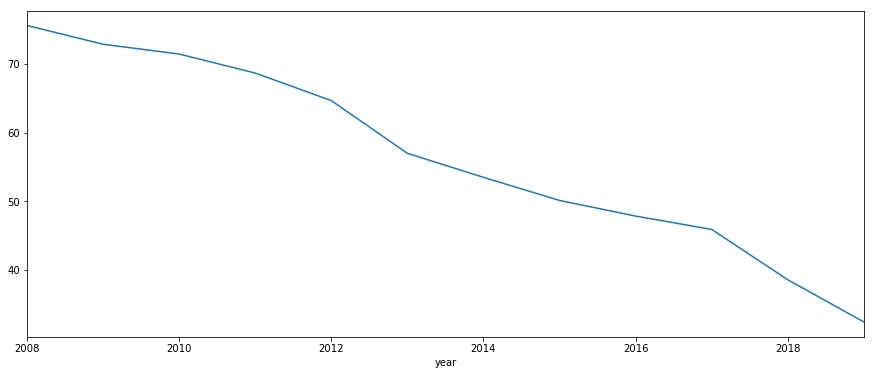

In [25]:
plt.figure(figsize=(15, 6))
qanda.sort_values('year').set_index('year')['perc_answered'].plot()

#### 2. What are the 10 ‘easiest’ gold badges to earn?

Use following tables:

> - `bigquery-public-data.stackoverflow.badges`
- `bigquery-public-data.stackoverflow.users`

- How many classes are there?
- Badges of which classes are easy to earn?

#### 3. Which day of the week has most questions answered within an hour?

Use following tables:

> - `bigquery-public-data.stackoverflow.posts_answers`
- `bigquery-public-data.stackoverflow.posts_questions`

#### 4. Does adding a “?” actually help user to get answers?

Sara Robinson claimed that only 21% questions end with a question mark(?).

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">Did you know...only 21% of <a href="https://twitter.com/StackOverflow?ref_src=twsrc%5Etfw">@StackOverflow</a> questions end with a question mark? <a href="https://t.co/b939b3xwU0">https://t.co/b939b3xwU0</a> <a href="https://t.co/LfVnjrPPJw">pic.twitter.com/LfVnjrPPJw</a></p>&mdash; Sara Robinson (@SRobTweets) <a href="https://twitter.com/SRobTweets/status/810892697116545024?ref_src=twsrc%5Etfw">December 19, 2016</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

- Verify her claim.

- Do you think adding question mark(?) at the end of question help user to get answer?

### What's Next?

This is only a start. Using tables of stackoverflow create your own question and answer them using data!

For inspiration try to answer [these](https://data.stackexchange.com/stackoverflow/queries) queries.